In [89]:
import json
import torch
from rdkit import Chem

In [2]:
cd ..

/Users/jiaqiguan/Research/LinkerDesign/DiffPROTAC


# Zinc

In [3]:
with open('data/zinc/molecules_zinc_test_final.json', 'r') as f:
    zinc_data = json.load(f)

In [4]:
data = zinc_data[0]

In [5]:
for k, v in data.items():
    print(k, len(v))

graph_in 21
graph_out 28
node_features_in 21
node_features_out 26
smiles_out 41
smiles_in 45
v_to_keep 21
exit_points 2
abs_dist 2
positions_out 26
positions_in 21


In [96]:
zinc_val = torch.load('/Users/jiaqiguan/Downloads/zinc_final_val.pt', map_location='cpu')

In [97]:
zinc_val[0]

{'uuid': 0,
 'name': 'C[C@H](NC(=O)NCCc1ccccn1)c1ccc(F)cc1Cl',
 'positions': tensor([[ 5.9437,  2.3562,  2.4837],
         [ 5.0319,  1.4974,  2.0101],
         [ 3.9749,  1.9751,  1.2500],
         [ 3.0259,  1.0796,  0.7568],
         [ 3.1197, -0.3041,  1.0265],
         [ 4.2144, -0.7573,  1.7877],
         [ 4.4648, -2.4291,  2.1450],
         [ 5.1630,  0.1429,  2.2814],
         [-3.9706,  2.7553, -1.9517],
         [-4.4307,  1.7189, -2.7530],
         [-4.2153,  0.4021, -2.3562],
         [-3.5454,  0.1560, -1.1584],
         [-3.2925, -1.2783, -0.7407],
         [-2.8226, -1.4493,  0.7082],
         [-3.0783,  1.1611, -0.3726],
         [-3.3063,  2.4294, -0.7826],
         [ 2.3203, -1.4534, -1.0417],
         [ 2.0673, -1.2499,  0.4568],
         [ 0.7281, -0.7322,  0.7199],
         [-0.3790, -1.5176,  0.5222],
         [-0.3642, -2.6410,  0.0410],
         [-1.5114, -0.8726,  0.9484]]),
 'one_hot': tensor([[0., 0., 0., 1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0.

# PROTAC-DB

In [86]:
import pickle
import pandas as pd
from rdkit import Chem
from tqdm.auto import tqdm
import utils.visualize as viz
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('data/protac/protac.csv')
warhead_df = pd.read_csv('data/protac/warhead.csv')
ligase_df = pd.read_csv('data/protac/e3_ligand.csv')
linker_df = pd.read_csv('data/protac/linker.csv')

In [8]:
# protac_sdf = Chem.SDMolSupplier('data/protac/protac.sdf')

In [9]:
df.head()

,Compound ID,Uniprot,Target,E3 ligase,PDB,Name,Smiles,DC50 (nM),Dmax (%),Assay (DC50/Dmax),...,XLogP3,Heavy Atom Count,Ring Count,Hydrogen Bond Acceptor Count,Hydrogen Bond Donor Count,Rotatable Bond Count,Topological Polar Surface Area,Molecular Formula,InChI,InChI Key
0,1,Q9NPI1,BRD7,VHL,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,NaN,NaN,NaN,...,3.03,68,7,15,3,19,189.92,C50H64N8O9S,InChI=1S/C50H64N8O9S/c1-32-45(68-31-53-32)34-1...,RPMQBLMPGMFXLD-PDUNVWSESA-N
1,1,Q9H8M2,BRD9,VHL,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,NaN,NaN,NaN,...,3.03,68,7,15,3,19,189.92,C50H64N8O9S,InChI=1S/C50H64N8O9S/c1-32-45(68-31-53-32)34-1...,RPMQBLMPGMFXLD-PDUNVWSESA-N
2,2,Q9NPI1,BRD7,VHL,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,NaN,NaN,NaN,...,2.74,74,7,17,3,25,208.38,C54H72N8O11S,InChI=1S/C54H72N8O11S/c1-36-49(74-35-57-36)38-...,NGWWVKZONFCNQP-SHPBXJAASA-N
3,2,Q9H8M2,BRD9,VHL,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,NaN,NaN,NaN,...,2.74,74,7,17,3,25,208.38,C54H72N8O11S,InChI=1S/C54H72N8O11S/c1-36-49(74-35-57-36)38-...,NGWWVKZONFCNQP-SHPBXJAASA-N
4,3,Q9H8M2,BRD9,CRBN,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,NaN,NaN,NaN,...,0.70,61,7,15,3,18,202.97,C43H50N8O10,InChI=1S/C43H50N8O10/c1-48-24-31(28-9-10-44-23...,RMBNUDOJPQLHMV-UHFFFAOYSA-N


In [82]:
def get_match_from_possible_list(mol, possible_smiles):
    match_smiles, match = None, None
    num_match_atoms = 0
    for smiles in possible_smiles:
        m = mol.GetSubstructMatch(Chem.MolFromSmiles(smiles))
        if len(m) > num_match_atoms:
            match_smiles, match, num_match_atoms = smiles, m, len(m)
            
    return match_smiles, match


def process_protac_db(df, warhead_df, ligase_df, linker_df, verbose=False):
    all_smiles = []
    all_index = []
    fail_cases = {'no_match': [], 'overlap': [], 'no_linker': [], 'discon_linker': []}
    for i in tqdm(df['Compound ID'].unique()):
        index = df[df['Compound ID'] == i].iloc[0]
        protac_smiles = index['Smiles']
        protac_mol = Chem.MolFromSmiles(protac_smiles)

        warhead_name, ligase_name = index['Target'], index['E3 ligase']
        possible_target_smiles = warhead_df[warhead_df['Target'] == warhead_name].Smiles.tolist()
        possible_ligase_smiles = ligase_df[ligase_df['Target'] == ligase_name].Smiles.tolist()

        warhead_smiles, warhead_match = get_match_from_possible_list(protac_mol, possible_target_smiles)
        ligase_smiles, ligase_match = get_match_from_possible_list(protac_mol, possible_ligase_smiles)
        if warhead_match is None or ligase_match is None:
            if verbose:
                print(f'Skip {i}! Not found matching warhead or ligase')
            fail_cases['no_match'].append(i)
            continue

        frags_match = warhead_match + ligase_match
        if len(set(warhead_match).intersection(set(ligase_match))) != 0:
            if verbose:
                print(f'Skip {i}! Warhead and ligase has overlap')
            fail_cases['overlap'].append(i)
            continue

        linker_atoms = tuple(set(list(range(protac_mol.GetNumAtoms()))) - set(frags_match))
        if len(linker_atoms) == 0:
            if verbose:
                print(f'Skip {i}! No linker')
            fail_cases['no_linker'].append(i)
            continue


        linker_smiles = Chem.MolFragmentToSmiles(protac_mol, linker_atoms)
        if '.' in linker_smiles or Chem.MolFromSmiles(linker_smiles) is None:
            if verbose:
                print(f'Skip {i}! Disconnected linker')
            fail_cases['discon_linker'].append(i)
            continue
        # assert linker_smiles in linker_df.Smiles.tolist(), (i, linker_smiles)

        ## smiles, linker smiles, warhead smiles, ligase smiles
        all_smiles.append([protac_smiles, linker_smiles, warhead_smiles, ligase_smiles])
        all_index.append({
            'smi_protac': protac_smiles,
            'smi_linker': linker_smiles,
            'smi_warhead': warhead_smiles,
            'smi_ligase': ligase_smiles,
            'atom_indices_warhead': warhead_match,
            'atom_indices_ligase': ligase_match,
            'atom_indices_linker': linker_atoms,
        })
    print('Num fails: ', [f'{k}: {len(v)}' for k, v in fail_cases.items()])
    print('Success: ', len(all_smiles))
    return all_smiles, all_index, fail_cases

In [84]:
all_smiles, all_index, fail_cases = process_protac_db(df, warhead_df, ligase_df, linker_df)

  0%|          | 0/3270 [00:00<?, ?it/s]

RDKit ERROR: [23:56:02] non-ring atom 0 marked aromatic
[23:56:02] non-ring atom 0 marked aromatic
RDKit ERROR: [23:56:02] non-ring atom 0 marked aromatic
[23:56:02] non-ring atom 0 marked aromatic
RDKit ERROR: [23:56:02] non-ring atom 0 marked aromatic
[23:56:02] non-ring atom 0 marked aromatic
RDKit ERROR: [23:56:02] non-ring atom 0 marked aromatic
[23:56:02] non-ring atom 0 marked aromatic
RDKit ERROR: [23:56:04] non-ring atom 12 marked aromatic
[23:56:04] non-ring atom 12 marked aromatic


Num fails:  ['no_match: 1744', 'overlap: 25', 'no_linker: 4', 'discon_linker: 358']
Success:  1139


In [79]:
with open('data/protac/smi_protac.txt', 'w') as f:
    for line in all_smiles:
        f.write("%s %s %s %s\n" % (line[0], line[1], line[2], line[3]))

In [87]:
with open('data/protac/index.pkl', 'wb') as f:
    pickle.dump(all_index, f)

In [70]:
protac_smiles, linker_smiles, warhead_smiles, ligase_smiles = zip(*all_smiles)

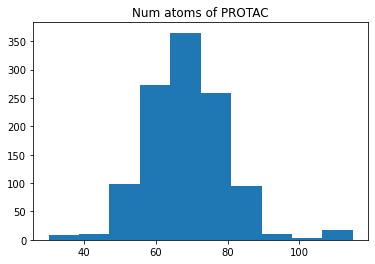

In [71]:
plt.hist([Chem.MolFromSmiles(s).GetNumAtoms() for s in protac_smiles])
plt.title('Num atoms of PROTAC')
plt.show()

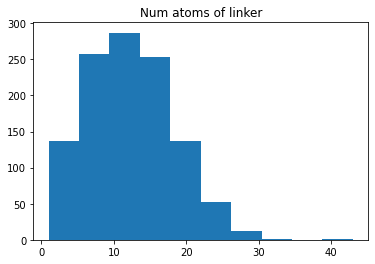

In [72]:
plt.hist([Chem.MolFromSmiles(s).GetNumAtoms() for s in linker_smiles])
plt.title('Num atoms of linker')
plt.show()

In [74]:
print(f'Num unique warhead: {len(set(warhead_smiles))} / {len(warhead_smiles)}')
print(f'Num unique ligase : {len(set(ligase_smiles))} / {len(ligase_smiles)}')

Num unique warhead: 184 / 1139
Num unique ligase : 33 / 1139
